<a href="https://colab.research.google.com/github/gedeon129/Data-110/blob/main/2_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      

        **Final Project:**




---

**Research Question:** *How does climate change affect agricultural productivity?*

This study investigates the impact of climate change on agricultural productivity by analyzing a dataset from Kaggle. Specifically, we examine trends in crop yields over the years for major grains and temperature variations. The analysis explores the relationships between multiple variables, including extreme weather events, economic outcomes, temperature, CO2 levels, and productivity. Additionally, we identify regions most affected by climate change across different countries and crop types impacted by these changes.

This dataset is from Kaggle

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go




EDA exploration

In [8]:
Climate_change = pd.read_csv('/content/climate change data 110.csv')
Climate_change.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [10]:
Climate_change.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [11]:
Climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [ ]:

Climate_change.describe()




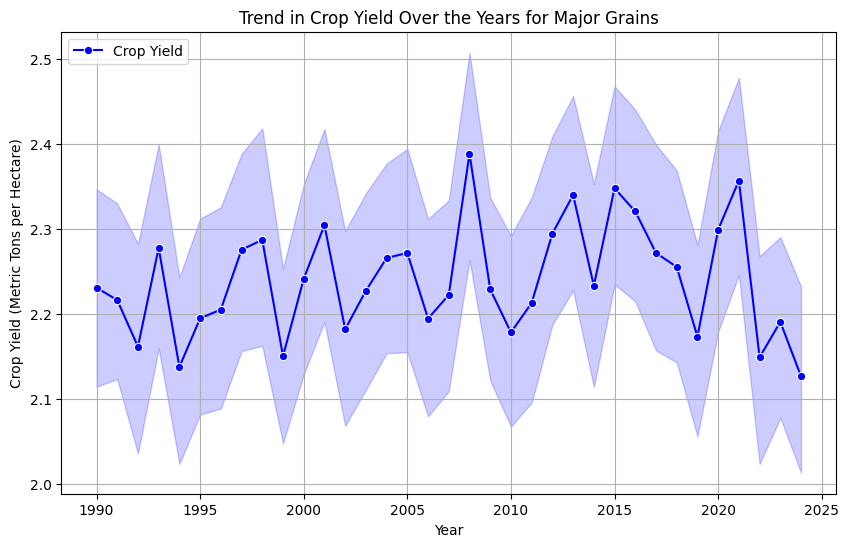

In [17]:




# Plotting the trend in crop yield over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=Climate_change, x='Year', y='Crop_Yield_MT_per_HA', color='blue', marker='o')
plt.title('Trend in Crop Yield Over the Years for Major Grains')
plt.xlabel('Year')
plt.ylabel('Crop Yield (Metric Tons per Hectare)')
plt.legend(['Crop Yield'], loc='upper left')
plt.grid(True)
plt.show()




The trend in crop yield over the years for major grains shows that 2009 has the highest crop yield , following by 2021, 2015 , and 2013. Aslo, 2024 has the lowest crop yield following by 1994 and 1999.

Generally it crop yield has increased due to advancements in agriculture technology, though recent declines may be due to climate change,extreme weather events,  and others factor

Figure: The line plot above illustrates the trend in crop yield over the years for major grains. "
      "This visualization helps us understand how crop yield has changed over time and can provide insights "
      "into the impact of climate change on agricultural productivity.")


In [18]:
import plotly.express as px

# Create a treemap
fig = px.treemap(Climate_change,
                 path=['Crop_Type'],
                 values='Crop_Yield_MT_per_HA',
                 title='Crop Types Affected by Climate Change',
                 color='Crop_Yield_MT_per_HA',
                 color_continuous_scale='Viridis',
                 labels={'Crop_Yield_MT_per_HA': 'Crop Yield (MT per HA)'})

fig.update_layout(coloraxis_colorbar=dict(
    title="Crop Yield (MT per HA)"
))

fig.show()


 This treemap helps visualize the impact of climate change on different crop types by showing the crop yield for each type. It provides a clear and interactive way to understand which crops are most affected by climate change, based on their yield. The yield is represented by a color gradient, where the highest yield is about  2.73 MT per hectare which is Wheat, following Barley, Sugarcane, Fruits and the lowest is about 2.60 MT per hectare which is Coton.


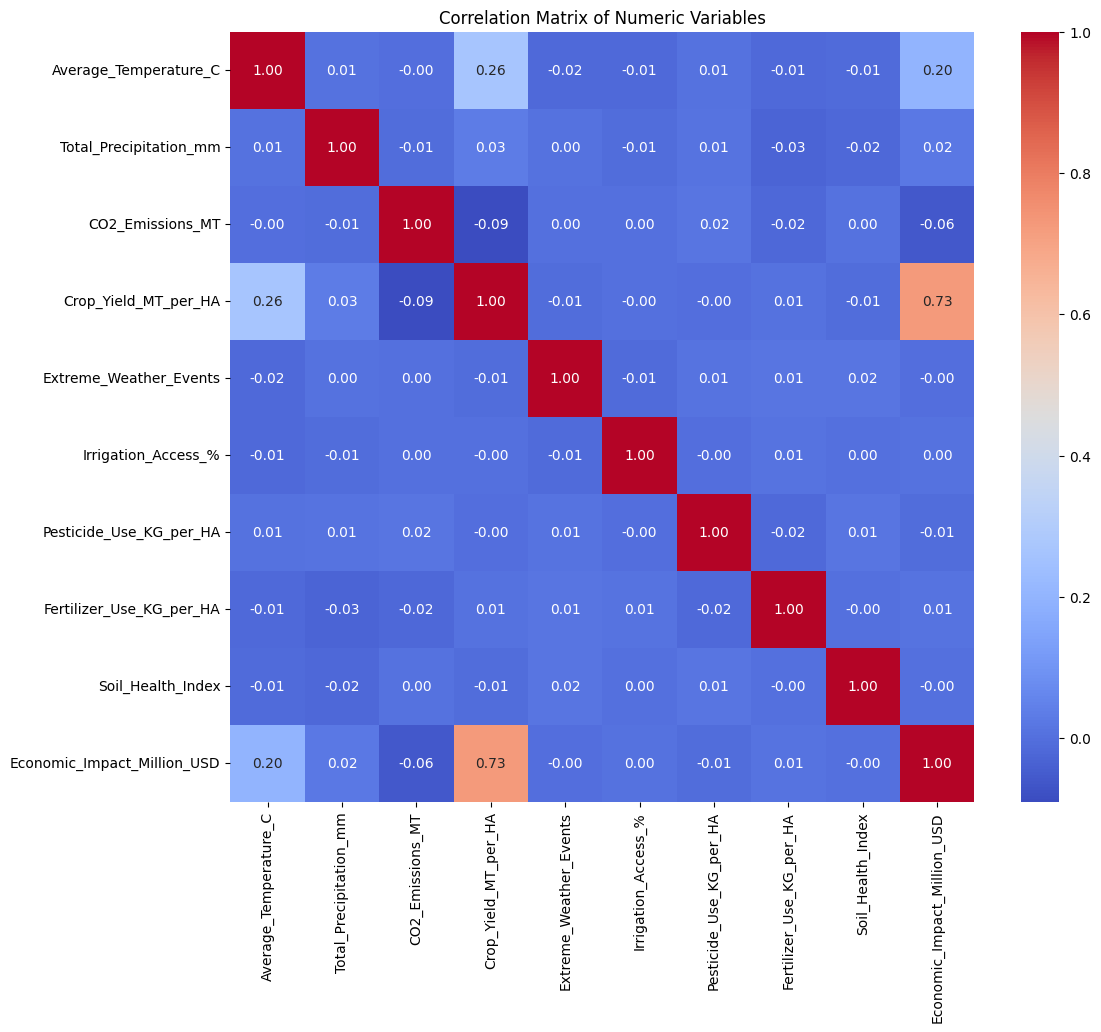

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = Climate_change[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
                           'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
                           'Soil_Health_Index', 'Economic_Impact_Million_USD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


 The correlation matrix shows the relationship between different variables. For example, there is a strong positive correlation between Crop_Yield_MT_per_HA and Economic_Impact_Million_USD. This means that as crop yield increases, economic impact also increases. There is also a strong negative correlation between CO2_Emissions_MT and Crop_Yield_MT_per_HA. This means that as CO2 emissions increase, crop yield decreases.


- Crop Yield and Economic Impact  (r = 0.73):
There is a strong positive correlation, suggesting that increases in crop yield are associated with higher economic impact. This relationship highlights the critical role of agricultural productivity in economic outcomes.
- Average Temperature  and Economic Impact (r = 0.20):
A weak positive correlation indicates that regions with higher temperatures may experience slight increases in economic impact, possibly due to climate-appropriate crops or other economic factors.
Weak or Negligible Correlations:

- Most variables, such as precipitation, extreme weather events, and irrigation access, show negligible correlations with crop yield or economic impact. This could indicate:
Limited direct influence of these factors on overall productivity in the dataset.
Potentially nonlinear or region-specific relationships that aren't captured by correlation alone.
Temperature and Crop Yield (r = 0.26):

- There is a weak positive correlation between average temperature and crop yield. This could suggest that moderate temperature increases are beneficial in certain contexts, though extreme temperatures might reduce productivity .
CO2 Emissions  and Other Variables:

- CO2 emissions show a weak negative correlation with crop yield (r = -0.09) and economic impact (r = -0.06). This suggests a potential detrimental effect of emissions on productivity, though the relationship is not strong.
- Soil Health and Crop Yield (r close to 0):

The near-zero correlation between soil health and crop yield may indicate either data issues ( limited soil health variability) or the need for more localized analysis. Insights for Climate Change and Agriculture:

- The strong correlation between crop yield and economic impact underlines the importance of agricultural productivity for economic resilience.
- Temperature shows a modest positive relationship with both yield and economic impact, highlighting the nuanced effects of climate variables.
Need for Deeper Analysis: Weak correlations for variables like extreme weather events and irrigation suggest the need to:
Explore nonlinear models.
Investigate region-specific impacts of these variables on agriculture.


***Another way to explain it ***
Strong Positive Correlation:

Crop Yield ↔ Economic Impact (r = 0.73): Higher yields significantly boost economic outcomes.
Weak Positive Correlations:

Temperature ↔ Crop Yield (r = 0.26): Moderate temperatures may slightly benefit yields.
Temperature ↔ Economic Impact (r = 0.20): Higher temperatures correlate weakly with economic gains.
Negligible Correlations:

Variables like precipitation, extreme weather events, and irrigation show little direct impact on yields or economics, possibly masking nonlinear effects.
CO2 Emissions ↔ Crop Yield (r = -0.09): Weak negative relationship suggests minor productivity impact.











<ipython-input-16-a453a6cce9dc>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



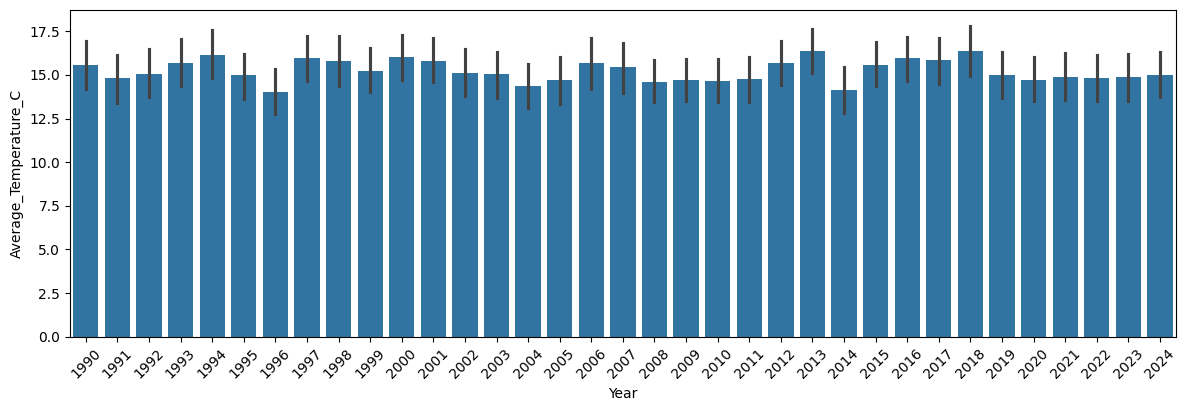

In [16]:
plt.figure(figsize=(12, 4))
# Assuming 'Year' is a column in your DataFrame, use 'Year' (or the correct column name)
barplot_2 = sns.barplot(data=Climate_change ,x='Year', y='Average_Temperature_C')
plt.tight_layout()
# Assuming 'barplot_2' is intended here, not 'barplot'
barplot_2.set_xticklabels(barplot_2.get_xticklabels(), rotation=45)
plt.show()


-This bar graph display average temperature over the years from 1990 to 2024. The vertical axis represents the temperature values, while the horizontal axis represents the years.

-The general trend shows variations in the annual average temperature, with some fluctuations but an overall tendency for temperatures to remain within the 13°C to 17°C range. There are also error bars on each bar, indicating uncertainty or variability for each years data.

-- Long-term trend: There is no strong upward or downward trend over the 34-year period; however, the last 4 years show slightly warmer and more stable average temperatures compared to earlier years.

-- years like 1994,1997,2000,2006, 2013,2016, and 2019 have highest average temperature compared to others years



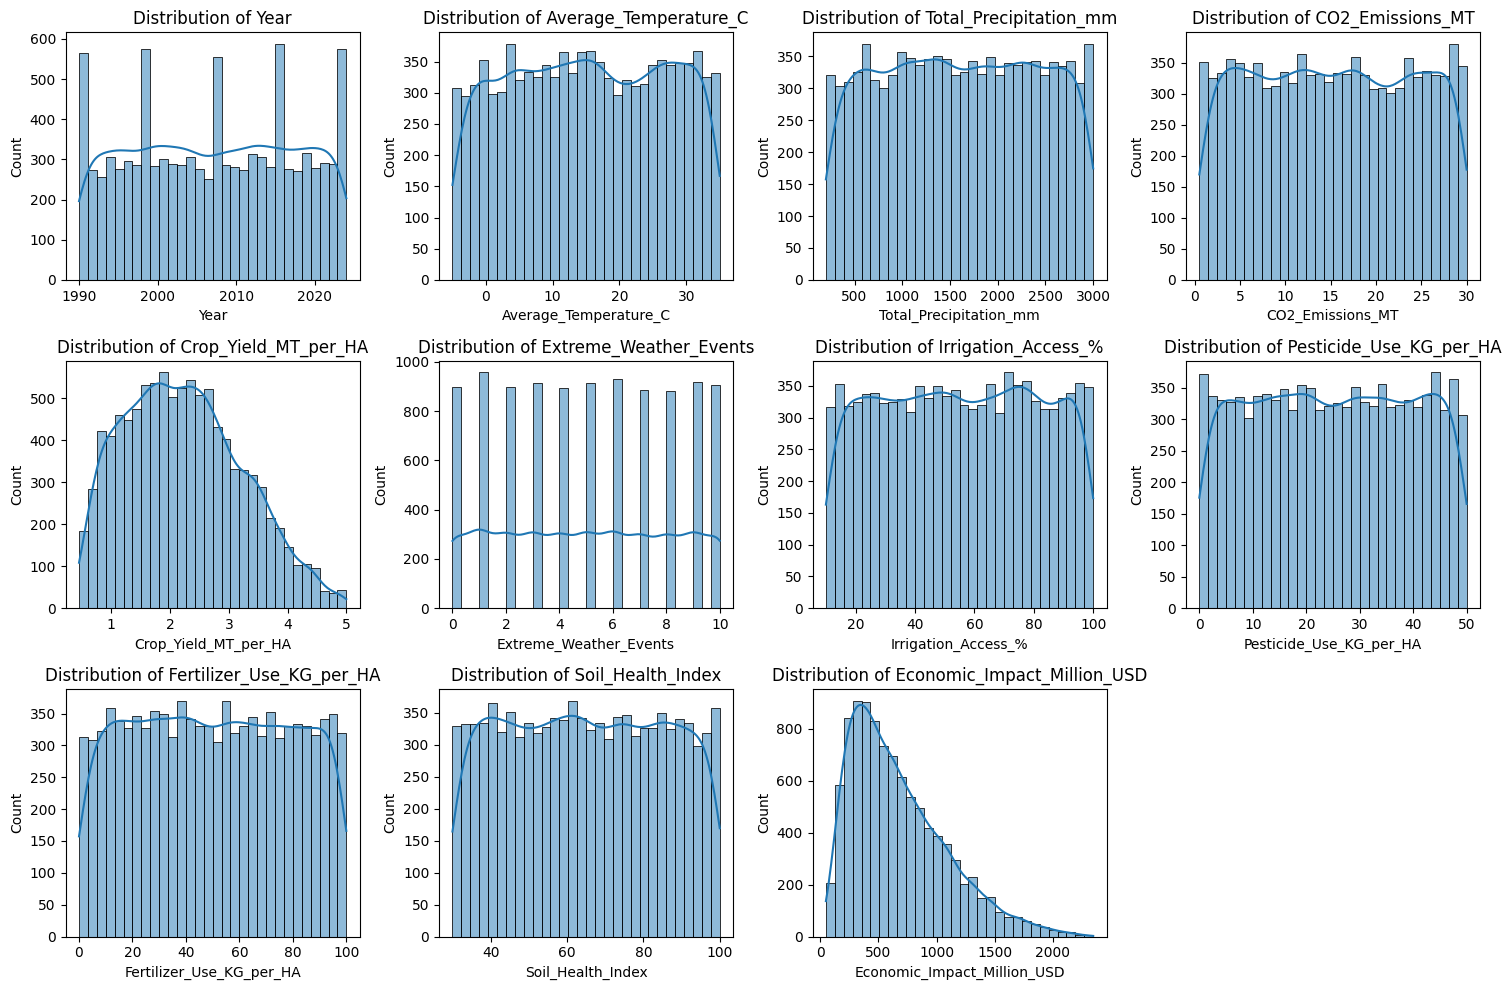

In [12]:
columns_to_plot = ['Year', 'Average_Temperature_C', 'Total_Precipitation_mm',
       'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
       'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Economic_Impact_Million_USD']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.histplot(Climate_change[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


Figure: The histograms above show the distribution of various climate and agricultural variables. "
      "These visualizations help to understand the spread and central tendencies of the data, "
      "providing insights into how different factors related to climate change and agricultural productivity are distributed.")


The histograms above show the distribution of various climate and agricultural variables.  "These visualizations help to understand the spread and central tendencies of the data, " "providing insights into how different factors related to climate change and agricultural productivity are distributed."

 Key Observations:
Crop Yield (MT/HA):

Positively skewed, with most values concentrated between 2 and 4. High-yield outliers are less frequent.
Economic Impact (Million USD):

Highly skewed, with a majority of values under 1,000 and a gradual tapering of higher values. Suggests a few regions dominate economic contributions.
Average Temperature (°C):

Uniform distribution between 0–30°C, indicating diverse climatic conditions across regions.
Total Precipitation (mm):

Relatively uniform spread, with no significant peaks or troughs.
Extreme Weather Events:

Evenly distributed, suggesting similar reporting across regions or years.
Irrigation Access (%):

Broad distribution, but a clustering near 100% indicates many regions with high irrigation coverage.
Fertilizer and Pesticide Use:

Broad uniform distribution, indicating a wide range of agricultural practices.
Soil Health Index:

Uniformly distributed, likely reflecting diverse soil qualities across sampled regions.

The skewed distributions of Crop Yield and Economic Impact suggest potential for identifying high-performing regions or crops.
Uniform distributions (temperature, precipitation) highlight the dataset's diversity, suitable for climate analysis.









In [14]:
import pandas as pd
import plotly.express as px

# Assuming 'Crop_Yield_MT_per_HA' or other relevant column reflects impact, replace 'Impact_Score'
fig = px.choropleth(Climate_change,
                    locations='Country',
                    locationmode='country names',
                    color='Crop_Yield_MT_per_HA',  # Replace with an existing column name like 'Crop_Yield_MT_per_HA'
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title='Impact of Climate Change on Agriculture Across Countries')

fig.show()

**this map visualizes the impact of climate change on agriculture across countries by representing crop yield (measured in "MT per HA") with a color gradient.**



Dark purple indicates low crop yield values, while bright green and yellow indicate high crop yields.
Regional Insights:

Russia and surrounding regions: Represented in purple, indicating significantly low crop yields due to climate change impacts.
South America ( Brazil): Shows a mix of green and purple, suggesting varied impacts on agriculture across regions.
India and parts of Southeast Asia: Highlighted in green, indicating relatively higher crop yields despite climate challenges.
Australia and parts of North America: Represent moderate crop yield values, shown in blue-green.
Potential Analysis Areas:

Geographical patterns: Climate change has a more severe impact on crop yields in northern latitudes like Russia and less severe in parts of Asia and South America.
Outliers: Regions like India might be benefiting from current climate or agricultural practices compared to other countries.

***Conclusion:***
To conclude, The trend in crop yield over the years for major grains shows that 2009 has the highest crop yield and   2024 has the lowest crop yield . Also, crops are most affected by climate change, based on their yield. The highest yield is about 2.73 MT per hectare which is Wheat and the lowest is about 2.60 MT per hectare which is Coton. In addition, there is a strong positive correlation between Crop_Yield_MT_per_HA and Economic_Impact_Million_USD and There is also a strong negative correlation between CO2_Emissions_MT and Crop_Yield_MT_per_HA. moreover, years The highest average temperatures were recorded in 1994, 1997, 2000, 2006, 2013, 2016, and 2019. Additionally, the dataset reveals that crop yield and economic impact are positively skewed, with high-performing regions or crops standing out. Uniform distributions in temperature and precipitation indicate diverse climatic conditions, making the dataset suitable for climate analysis.finally, The map shows the impact of climate change on crop yields globally, with low yields in northern regions (Russia) and higher yields in areas like India and Southeast Asia.



***Implications:***
The findings suggest that climate change significantly reduces crop yields, particularly in northern regions like Russia, while countries like India and Southeast Asia show resilience. The strong positive correlation between crop yield and economic impact highlights that regions with higher yields experience greater economic benefits, while the negative correlation with CO2 emissions indicates that rising emissions adversely affect yields. These trends emphasize the need for sustainable agricultural practices and CO2 reduction strategies to mitigate climate impacts on global food production.








***Suggestions for Future Research:***

Investigate the underlying factors contributing to India's and Southeast Asia's resilience in crop yields.
Analyze the impact of CO2 emissions and temperature changes on specific crop types beyond wheat and cotton.
Explore the effectiveness of adaptive agricultural techniques (irrigation systems, crop rotation) in combating climate change.
Conduct regional studies to identify localized strategies for improving yields in northern regions like Russia.
Examine the long-term economic consequences of declining crop yields on food security and global trade systems.